In [1]:
import numpy as np 
import pandas as pd 
import os

# Visualisation libraries
import matplotlib.pyplot as plt

'''import seaborn as sns
sns.set()
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import chart_studio.plotly as py
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')'''






# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")# for pretty graphs

for dirname, _, filenames in os.walk('dataSet'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

dataSet/Responses.csv


In [2]:
responsesVar = pd.read_csv('dataSet/Responses.csv')

In [3]:
display("Responses Data")
display(responsesVar.head(5))

'Responses Data'

,Timestamp,Gender,Age,Age.1,What are you studying?,"Current Year of Study, If you are in UG",What is your CGPA/10th/11th/12th Grade Marks?(most recent),"Have you ever heard of the term ""mental health""?",Overall how would you rate your physical health?,Overall how would you rate your mental health?,...,How many hours do you sleep per day?.1,Are you satisfied with the work-life balance in your current job?,I tend to bottle up my feelings when I'm angry or annoyed,I find that I don't have time for many interests/ hobbies outside of work,I feel that there are too many deadlines in my work/life that are difficult to meet,I frequently have guilty feelings if I relax and do nothing,Do you have a family history of any mental disorders?,Do you have any mental conditions? Do you feel like it will interfere with your work?,What is your relationship status?,Have you changed your job recently?
0,8/18/2023 2:04:27,Female,Below 23 years of age,19.0,College(UG),2.0,9.10,Yes,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8/18/2023 2:15:30,Female,Below 23 years of age,20.0,College(UG),2.0,9.09,Yes,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8/18/2023 2:25:17,Female,Below 23 years of age,20.0,College(UG),2.0,9.44,Yes,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8/18/2023 11:32:55,Female,Below 23 years of age,20.0,College(UG),2.0,9.30,Yes,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8/18/2023 11:42:54,Female,Below 23 years of age,20.0,College(UG),2.0,8.75,Yes,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
responsesVar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 42 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   Timestamp                                                                                                                 216 non-null    object 
 1   Gender                                                                                                                    216 non-null    object 
 2   Age                                                                                                                       216 non-null    object 
 3   Age.1                                                                                                                     132 non-null 

In [5]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(responsesVar)
missing_values.style.background_gradient(cmap='Blues')

Your selected dataframe has 42 columns.
There are 39 columns that have missing values.


,Missing Values,% of Total Values
Age.2,131,60.600000
How many hours do you sleep per day?.1,131,60.600000
Overall how would you rate your mental health?.1,131,60.600000
Do you Suffer from Depression?.1,131,60.600000
Do you Suffer from Anxiety/Panic Attacks?.1,131,60.600000
Have you noticed any change in your diet habits?.1,131,60.600000
How often has your mental health affected your ability to get work done?.1,131,60.600000
How often do you feel positive about your life?,131,60.600000
"On a scale of 1 to 5, how would you rate your stress levels at work?",131,60.600000
Are you satisfied with the work-life balance in your current job?,131,60.600000


In [6]:
#responsesVar["Have you ever faced bullying or harassment (in person or online)?"]=responsesVar["Have you ever faced bullying or harassment (in person or online)?"].fillna("No")
responsesVar["Have you ever faced bullying or harassment (in person or online)?"]=responsesVar["Have you ever faced bullying or harassment (in person or online)?"].map({"Yes":1,"No":0})

In [7]:
print(responsesVar["Have you ever faced bullying or harassment (in person or online)?"].value_counts())
print(responsesVar["Have you ever faced bullying or harassment (in person or online)?"])

Have you ever faced bullying or harassment (in person or online)?
0.0    94
1.0    37
Name: count, dtype: int64
0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
211    0.0
212    NaN
213    NaN
214    NaN
215    0.0
Name: Have you ever faced bullying or harassment (in person or online)?, Length: 216, dtype: float64


<Axes: title={'center': 'Bullying or Harassment faced?'}, xlabel='Yes                                           No', ylabel='Count'>

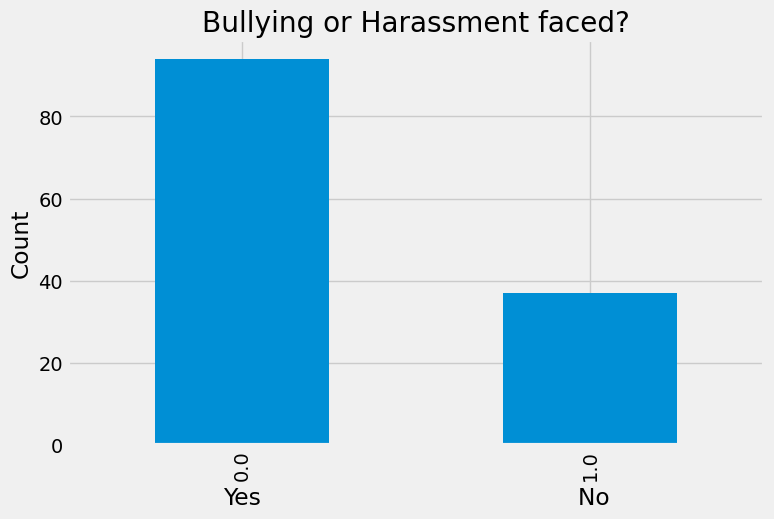

In [8]:
harrassmentCount = responsesVar["Have you ever faced bullying or harassment (in person or online)?"].value_counts()
harrassmentCount.plot(kind='bar', title='Bullying or Harassment faced?',xlabel='Yes                                           No',ylabel='Count')
#plt.bar(harrassmentCount.index,harrassmentCount.values)
#plt.xlabel('Have you ever faced bullying or harassment (in person or online)?')
#plt.ylabel('Count')
#plt.show()

In [9]:
harrassmentAvg = responsesVar["Have you ever faced bullying or harassment (in person or online)?"].mean()
print(f"Average: {round(harrassmentAvg,4)}")
harassmentMedian = responsesVar["Have you ever faced bullying or harassment (in person or online)?"].median()
print(f"Median: {round(harassmentMedian,4)}")
harassmentMode =responsesVar['Have you ever faced bullying or harassment (in person or online)?'].mode()
print(f"Mode: {round(harassmentMode,4)}")

Average: 0.2824
Median: 0.0
Mode: 0    0.0
Name: Have you ever faced bullying or harassment (in person or online)?, dtype: float64


In [10]:


responsesVar["Do you feel pressure to perform academically from your parents/guardians?"] =responsesVar["Do you feel pressure to perform academically from your parents/guardians?"].map({"Yes":1,"No":0})


<Axes: title={'center': 'Pressure to perform academically?'}, xlabel='Yes                                           No', ylabel='Count'>

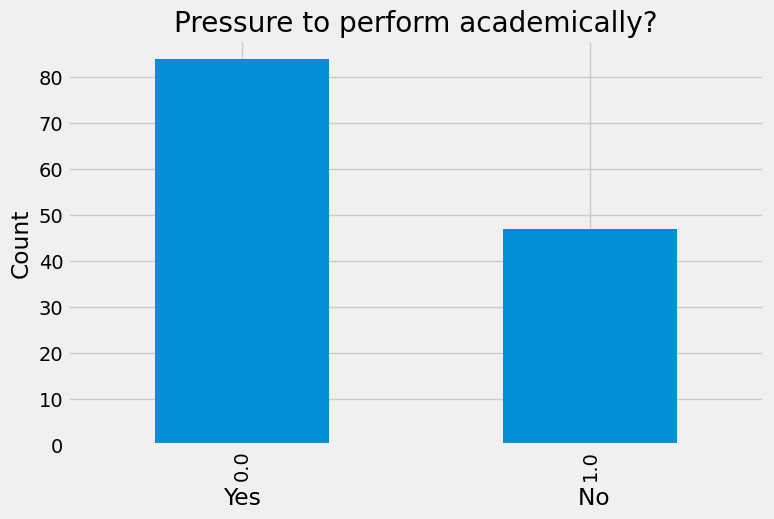

In [11]:
pressureAcademic = responsesVar["Do you feel pressure to perform academically from your parents/guardians?"].value_counts()
pressureAcademic.plot(kind='bar', title='Pressure to perform academically?',xlabel='Yes                                           No',ylabel='Count')



In [12]:
responsesVar["How often have you been missing your classes lately?"] = responsesVar["How often have you been missing your classes lately?"].map({"Never":0,"Rarely":1,"Sometimes":2,"Often":3,"Always":4})

How often have you been missing your classes lately?
2.0    28
3.0    20
0.0    15
Name: count, dtype: int64 Index([2.0, 3.0, 0.0], dtype='float64', name='How often have you been missing your classes lately?')


<Axes: title={'center': 'Missing classes lately?'}, ylabel='Count'>

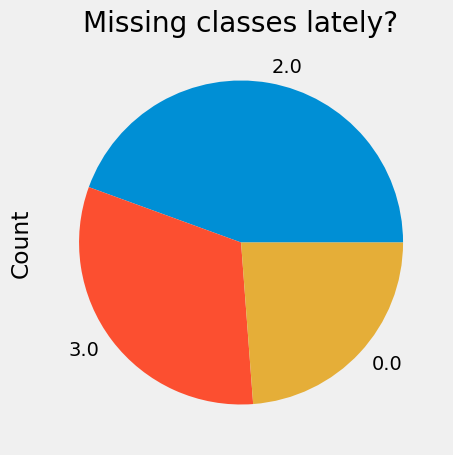

In [13]:
missClasses = responsesVar["How often have you been missing your classes lately?"].value_counts()
print(missClasses,missClasses.index)
missClasses.plot(kind='pie', title='Missing classes lately?',xlabel='',ylabel='Count')

In [14]:
responsesVar["Are you able to complete your assignment/homework within deadlines?"]=responsesVar["Are you able to complete your assignment/homework within deadlines?"].map({"Yes":1,"No":0})

<Axes: title={'center': 'Able to complete assignment within deadlines?'}, xlabel='Yes                                           No', ylabel='Count'>

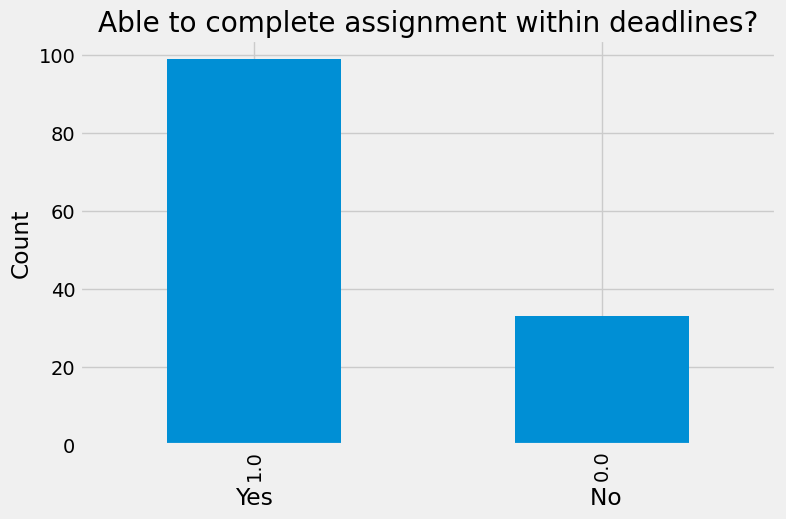

In [15]:
deadlineAssignment = responsesVar["Are you able to complete your assignment/homework within deadlines?"].value_counts()
deadlineAssignment.plot(kind='bar', title='Able to complete assignment within deadlines?',xlabel='Yes                                           No',ylabel='Count')

In [16]:
responsesVar["Have you ever heard of the term \"mental health\"? "] = responsesVar["Have you ever heard of the term \"mental health\"? "].map({"Yes":1,"No":0})

<Axes: title={'center': 'Heard of the term "mental health"?'}, xlabel='Yes                                           No', ylabel='Count'>

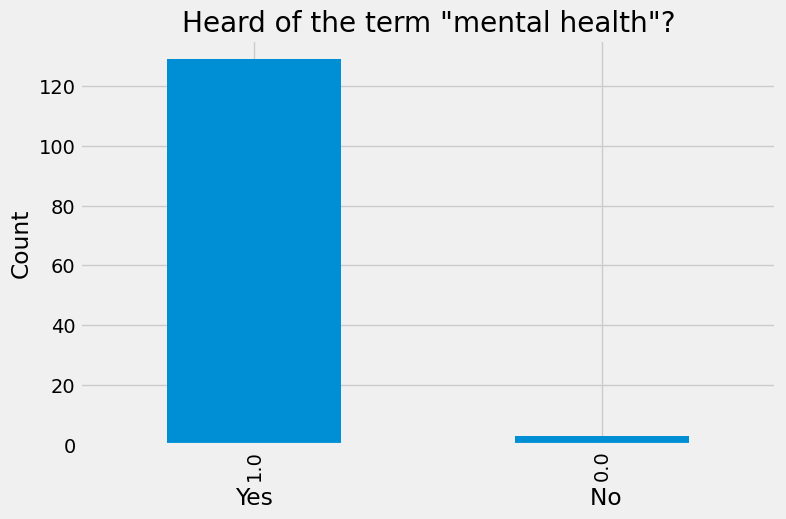

In [17]:
mentalHealth = responsesVar["Have you ever heard of the term \"mental health\"? "].value_counts()
mentalHealth.plot(kind='bar', title='Heard of the term "mental health"?',xlabel='Yes                                           No',ylabel='Count')

<Axes: title={'center': 'Year of Study UG'}, ylabel='count'>

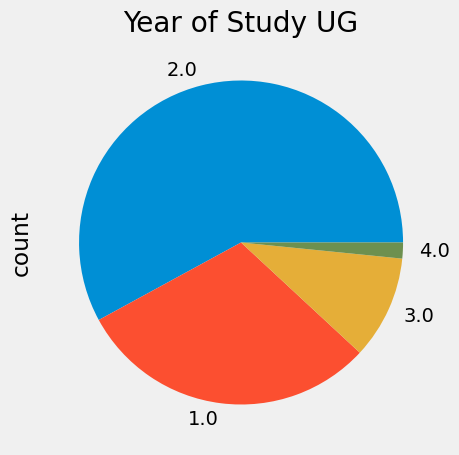

In [18]:
yearOfStudyUG= responsesVar["Current Year of Study, If you are in UG"].value_counts()
yearOfStudyUG.plot(kind='pie', title='Year of Study UG')


<Axes: title={'center': 'Age'}, ylabel='Count'>

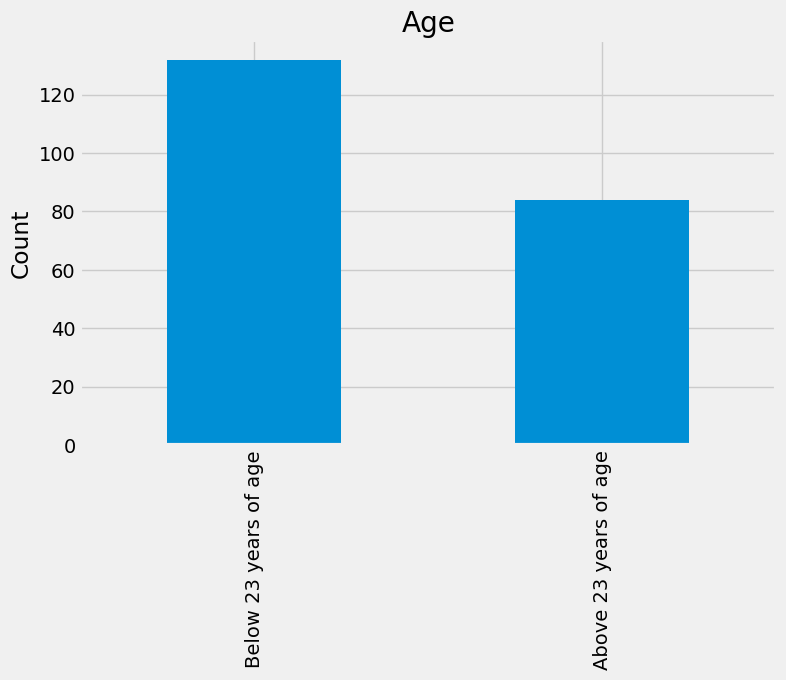

In [19]:
ageCount = responsesVar["Age"].value_counts()
ageCount.plot(kind='bar', title='Age',xlabel='',ylabel='Count')


<Axes: title={'center': 'Age'}, ylabel='Count'>

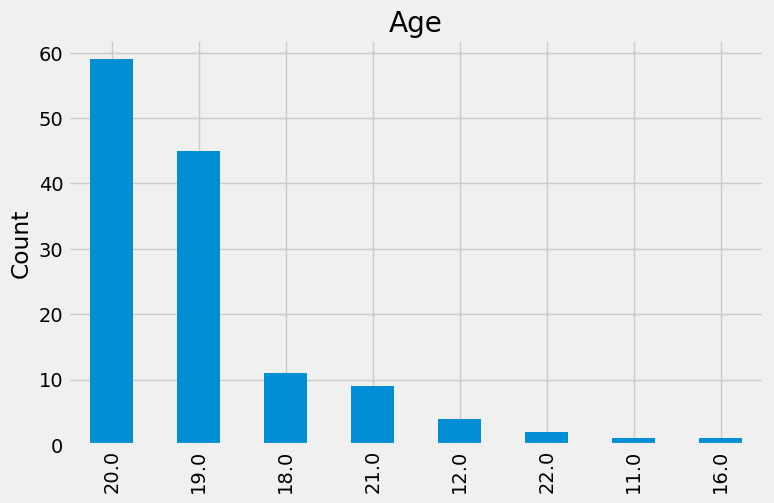

In [20]:
ageCounter = responsesVar["Age.1"].value_counts()
ageCounter.plot(kind='bar', title='Age',xlabel='',ylabel='Count')

Interval
(8.0, 9.0]     50
(9.0, 10.0]    42
(7.0, 8.0]     23
(6.0, 7.0]     12
(4.0, 5.0]      1
(5.0, 6.0]      1
Name: count, dtype: int64
Average: 9.6668
Median: 8.69


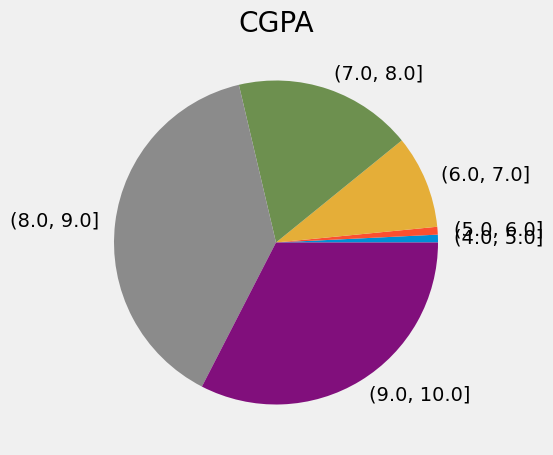

In [32]:


class_intervals = [4.0,5.0,6.0,7.0,8.0,9.0,10.0]
cgpaCount = responsesVar["What is your CGPA/10th/11th/12th Grade Marks?(most recent)"].value_counts()


responsesVar["Interval"] = pd.cut(responsesVar["What is your CGPA/10th/11th/12th Grade Marks?(most recent)"], bins = class_intervals)
print(responsesVar["Interval"].value_counts())
interval_counts = responsesVar["Interval"].value_counts().sort_index()

interval_counts.plot(kind='pie', title='CGPA',ylabel='',xlabel='')
cgpaAvg = responsesVar["What is your CGPA/10th/11th/12th Grade Marks?(most recent)"].mean()
cgpaMedian = responsesVar["What is your CGPA/10th/11th/12th Grade Marks?(most recent)"].median()
cgpaStdDev = responsesVar["What is your CGPA/10th/11th/12th Grade Marks?(most recent)"].std()
print(f"Average: {round(cgpaAvg,4)}")
print(f"Median: {round(cgpaMedian,4)}")


In [34]:
data_points = np.linspace(cgpaAvg - 3 * cgpaStdDev, cgpaAvg + 3 * cgpaStdDev, 1000)


In [36]:
pdf_values = (1 / (cgpaStdDev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((data_points - cgpaAvg) / cgpaStdDev) ** 2)


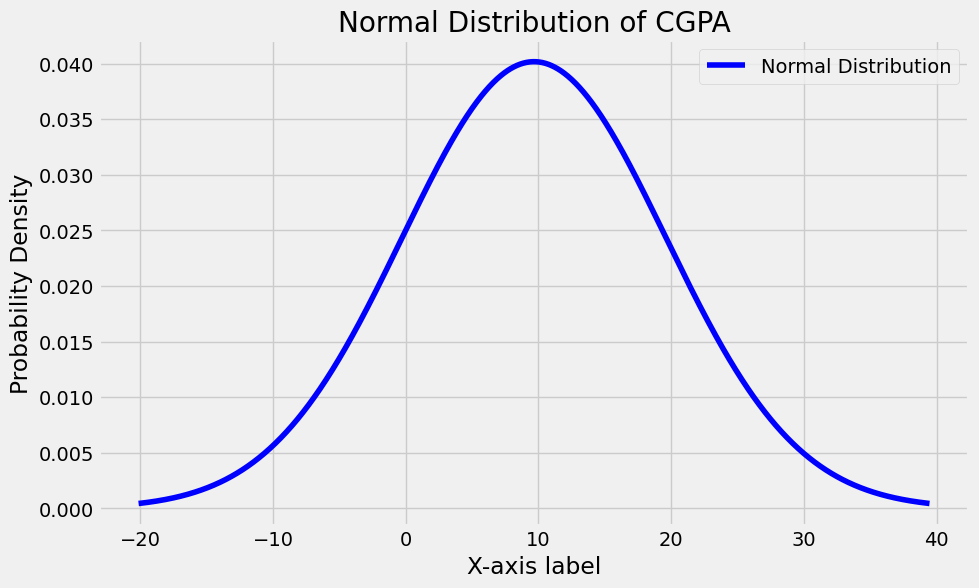

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(data_points, pdf_values, label='Normal Distribution', color='blue')
plt.xlabel('X-axis label')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of CGPA')
plt.legend()
plt.grid(True)  
plt.show()
